# WeightWatcher  

### Basic Functionality

https://calculationconsulting.com

In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Quick start example

### 1.1 Import your model (Keras or PyTorch)

In [3]:
import tensorflow 
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

2021-08-15 23:22:20.824503: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 1.2 Run WeightWatcher

In [4]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)
details = watcher.analyze()

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
2021-08-15 23:22:25.801202: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assu

In [5]:
details

,layer_id,name,D,M,N,alpha,alpha_weighted,best_fit,entropy,has_esd,...,num_evals,num_pl_spikes,rank_loss,rf,sigma,spectral_norm,stable_rank,sv_max,xmax,xmin
0,1,None,0.263162,3.0,64.0,17.964419,10.586249,truncated_power_law,0.850180,1.0,...,27.0,6.0,0.0,9.0,6.925695,3.884095,9.505237,1.970811,3.884095,3.344868
1,2,None,0.152662,64.0,64.0,1.215135,0.142107,truncated_power_law,0.684300,True,...,576.0,440.0,0.0,9.0,0.010256,1.309024,25.746691,1.144126,1.309024,0.000017
2,4,None,0.100017,64.0,128.0,5.218205,0.447850,truncated_power_law,0.760132,True,...,576.0,28.0,0.0,9.0,0.797166,1.218497,31.414363,1.103856,1.218497,0.477072
3,5,None,0.112554,128.0,128.0,4.626112,-1.234022,truncated_power_law,0.810864,True,...,1152.0,41.0,0.0,9.0,0.566304,0.541064,75.523342,0.735571,0.541064,0.252507
4,7,None,0.085135,128.0,256.0,2.385882,-0.281928,truncated_power_law,0.843018,True,...,1152.0,200.0,0.0,9.0,0.097997,0.761790,58.446355,0.872806,0.761790,0.066302
5,8,None,0.099876,256.0,256.0,2.894036,-0.821872,truncated_power_law,0.831052,True,...,2304.0,145.0,0.0,9.0,0.157291,0.520010,86.464827,0.721117,0.520010,0.085704
6,9,None,0.079483,256.0,256.0,3.039944,-1.051594,truncated_power_law,0.854156,True,...,2304.0,174.0,0.0,9.0,0.154648,0.450894,105.264507,0.671487,0.450894,0.077482
7,11,None,0.086864,256.0,512.0,6.261311,-2.323560,truncated_power_law,0.877141,True,...,2304.0,41.0,0.0,9.0,0.821679,0.425502,140.333575,0.652305,0.425502,0.202393
8,12,None,0.061533,512.0,512.0,2.999669,-1.081212,truncated_power_law,0.867504,True,...,4608.0,253.0,0.0,9.0,0.125718,0.436070,157.846567,0.660356,0.436070,0.064929
9,13,None,0.042709,512.0,512.0,3.076298,-0.880175,truncated_power_law,0.885953,True,...,4608.0,267.0,0.0,9.0,0.127067,0.517470,145.780589,0.719354,0.517470,0.061596


In [6]:
watcher.get_summary(details)

{'log_norm': 1.8940881404081074,
 'alpha': 4.199091838546124,
 'alpha_weighted': 0.46292423241588193,
 'log_alpha_norm': 1.2683716786794648,
 'log_spectral_norm': 0.04126474341953588,
 'stable_rank': 94.63694609989437}

## 2. Advanced examples

## 2.1 Filter by layer type (CONV1D, CONV2D, DENSE)

In this example we are interested in the DENSE layers only

### BROKEN  for now

## 2.2 Filter by multiple layer types

In this example we are interested in the CONV1D and DENSE layers.

Filter the layers using a bitmask.

In [9]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

details = watcher.analyze(layers=[ww.LAYER_TYPE.CONV1D,ww.LAYER_TYPE.DENSE])
details

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [<LAYER_TYPE.CONV1D: 8>, <LAYER_TYPE.DENSE: 4>]}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Filtering layer by type LAYER_TYPE.CONV1D
INFO:weightwatcher:Filtering layer by type LAYER_TYPE.DENSE
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


,layer_id,name,D,M,N,alpha,alpha_weighted,best_fit,entropy,has_esd,...,num_evals,num_pl_spikes,rank_loss,rf,sigma,spectral_norm,stable_rank,sv_max,xmax,xmin
0,20,None,0.025720,4096.0,25088.0,2.114746,1.695875,truncated_power_law,0.876346,1.0,...,4096.0,2072.0,0.0,1.0,0.024490,6.337652,86.612868,2.517469,6.337652,0.052220
1,21,None,0.033896,4096.0,4096.0,2.033438,1.815501,truncated_power_law,0.827196,True,...,4096.0,1349.0,13.0,1.0,0.028137,7.813102,41.569175,2.795193,7.813102,0.043177
2,22,None,0.036048,1000.0,4096.0,3.030622,2.868904,truncated_power_law,0.886831,True,...,1000.0,58.0,0.0,1.0,0.266634,8.843793,31.752616,2.973851,8.843793,0.972309


## 2.3 Filter by layer Ids

In [10]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

details = watcher.analyze(layers=[20])
details

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': [20]}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Filtering layer by id 20
Assuming nested distributions


,layer_id,name,D,M,N,alpha,alpha_weighted,best_fit,entropy,has_esd,...,num_evals,num_pl_spikes,rank_loss,rf,sigma,spectral_norm,stable_rank,sv_max,xmax,xmin
0,20,None,0.02572,4096.0,25088.0,2.114746,1.695875,truncated_power_law,0.876346,1.0,...,4096.0,2072.0,0.0,1.0,0.02449,6.337652,86.612868,2.517469,6.337652,0.05222


## 2.4 Plots

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': True, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
Assuming nested distributions


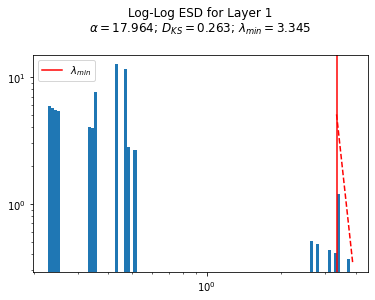

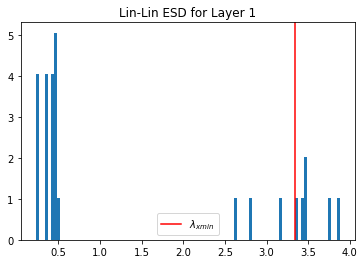

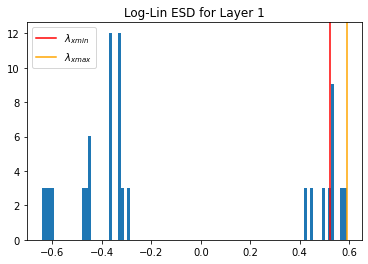

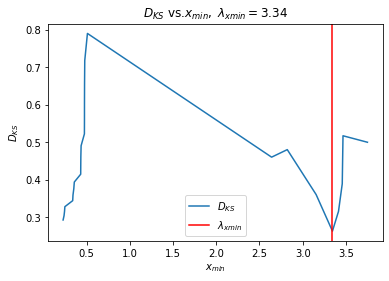

Assuming nested distributions


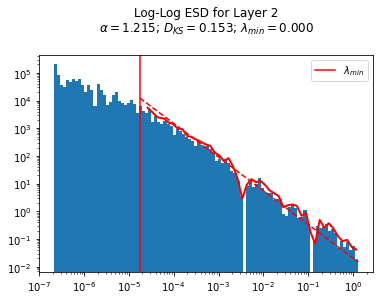

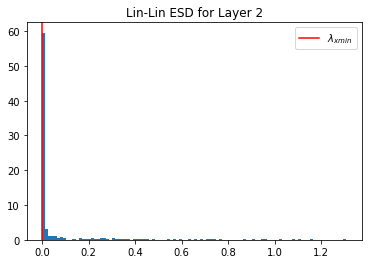

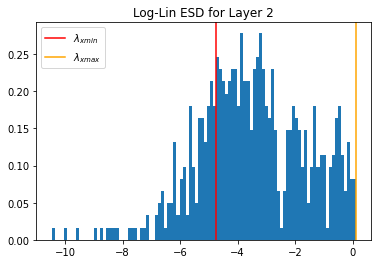

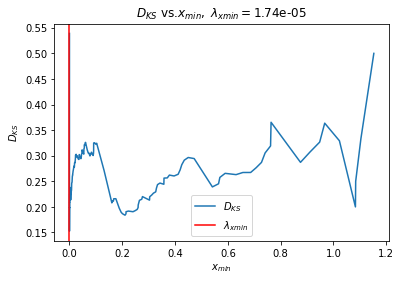

Assuming nested distributions


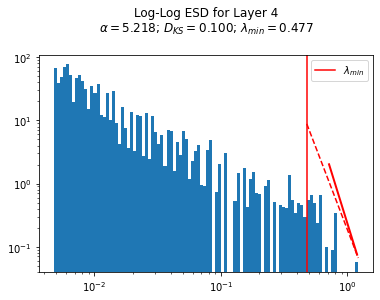

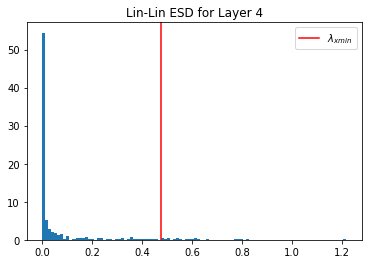

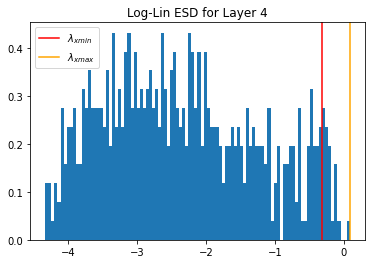

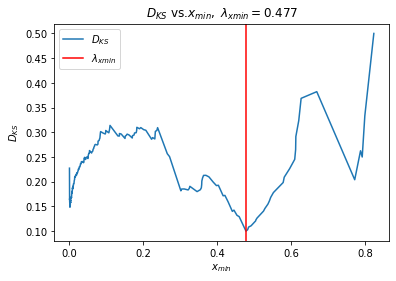

Assuming nested distributions


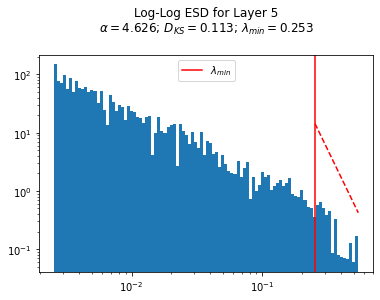

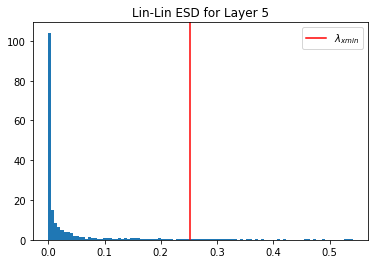

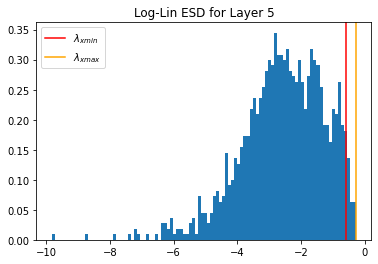

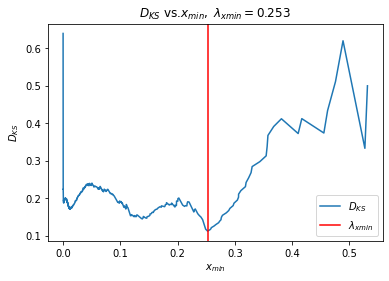

Assuming nested distributions


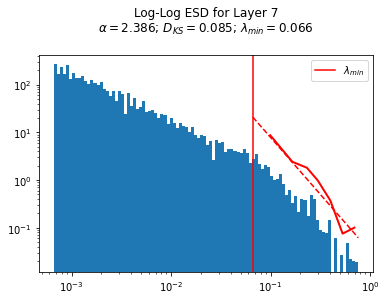

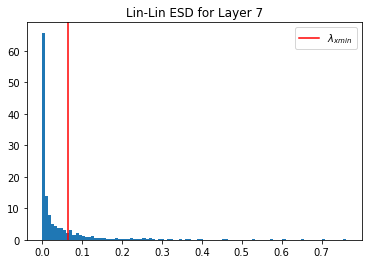

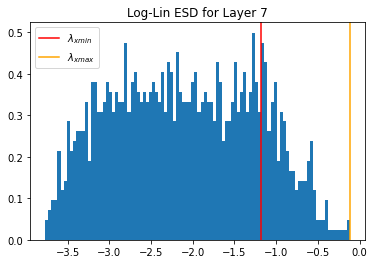

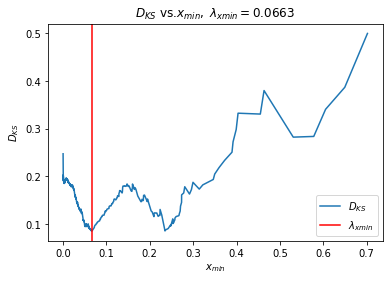

Assuming nested distributions


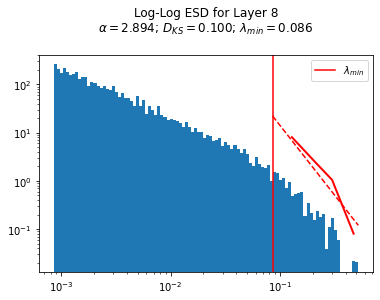

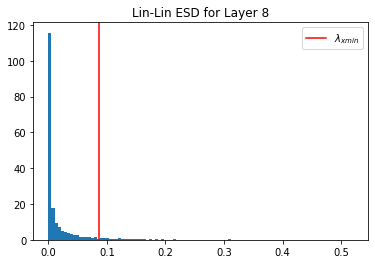

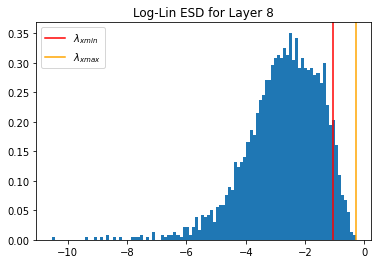

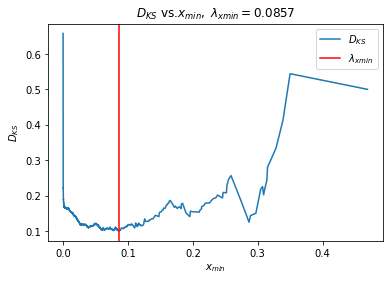

Assuming nested distributions


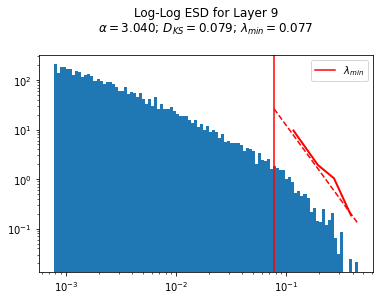

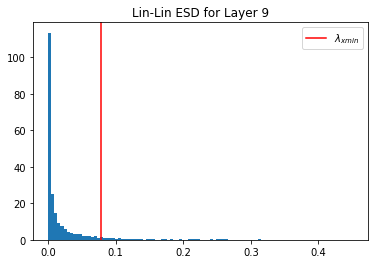

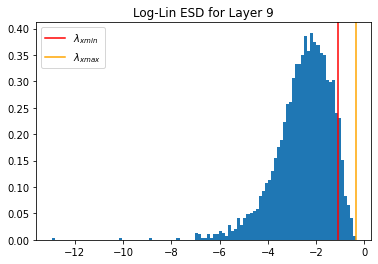

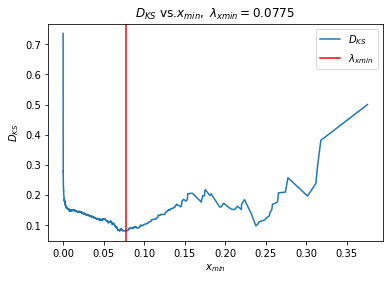

Assuming nested distributions


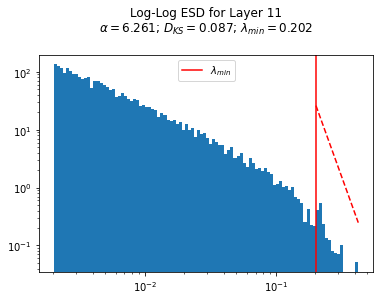

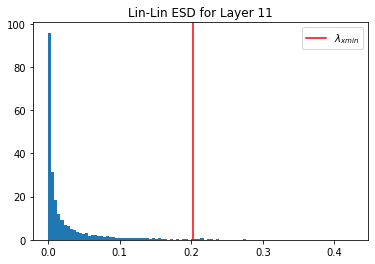

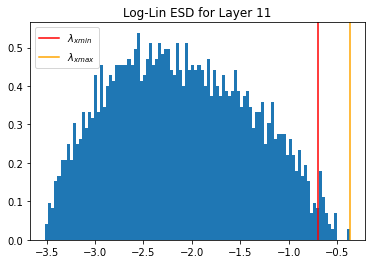

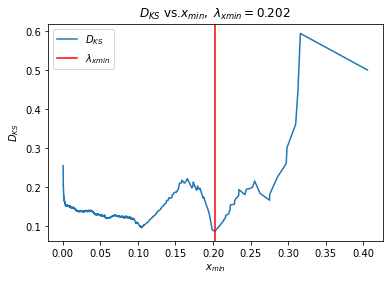

Assuming nested distributions


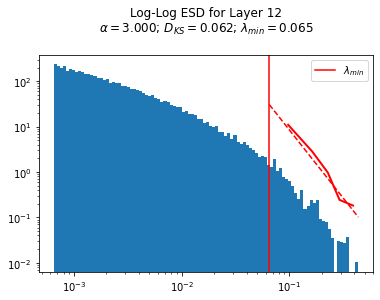

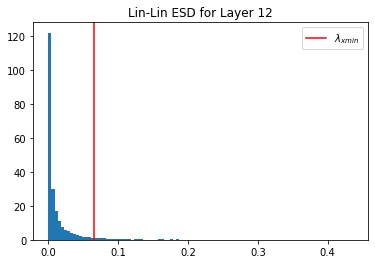

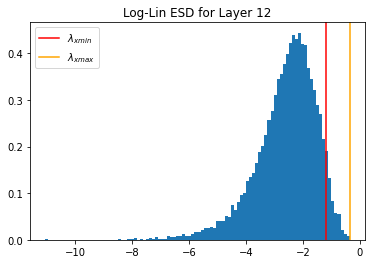

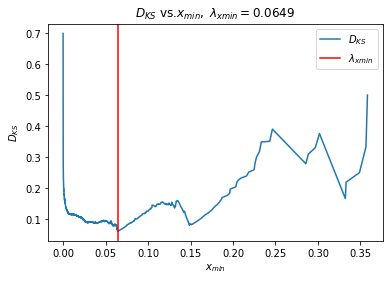

Assuming nested distributions


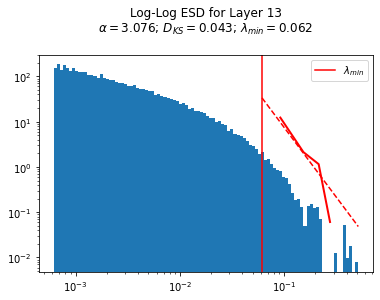

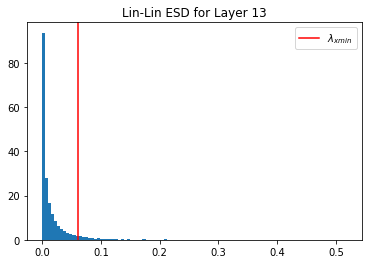

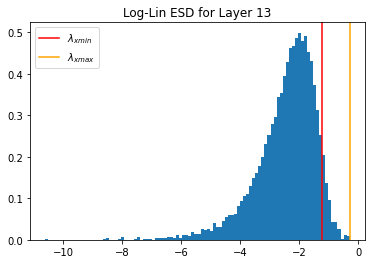

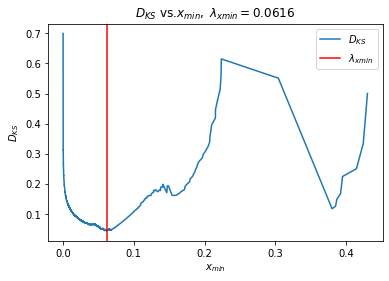

Assuming nested distributions


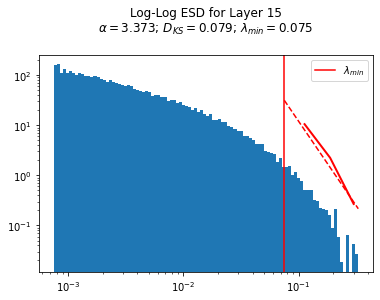

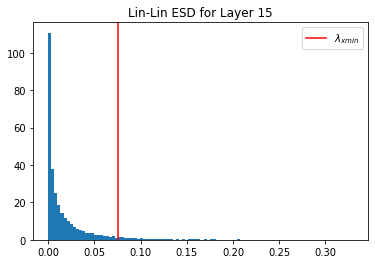

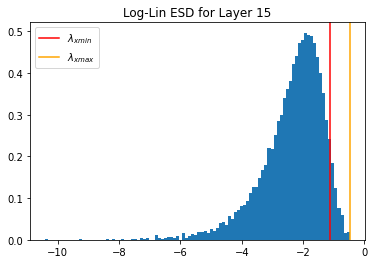

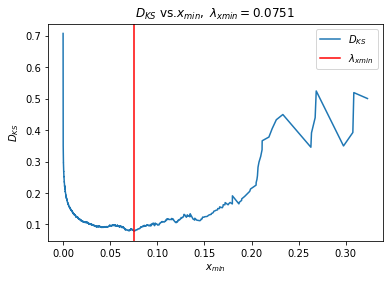

Assuming nested distributions


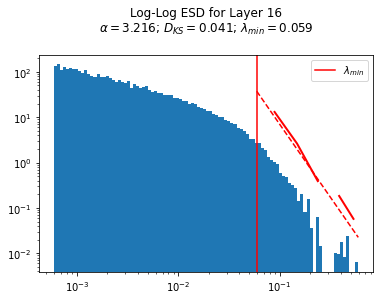

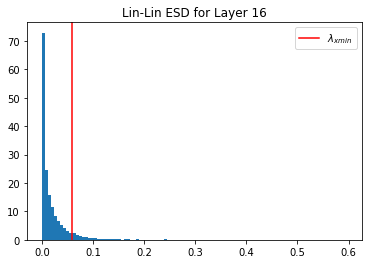

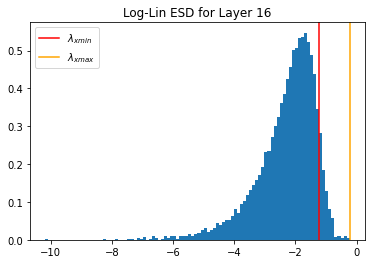

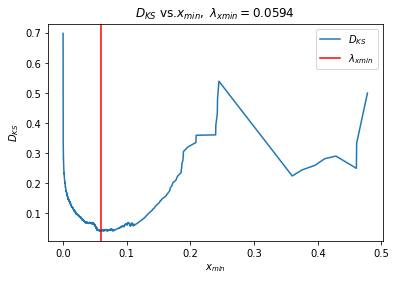

Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


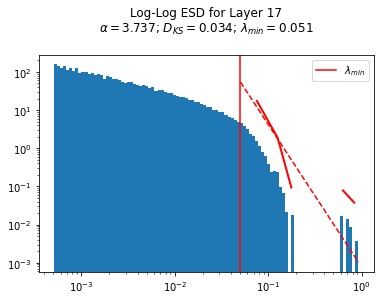

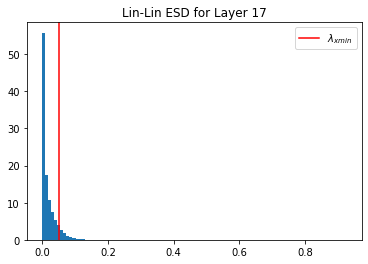

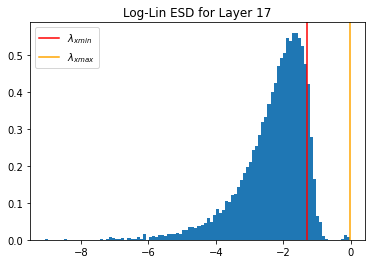

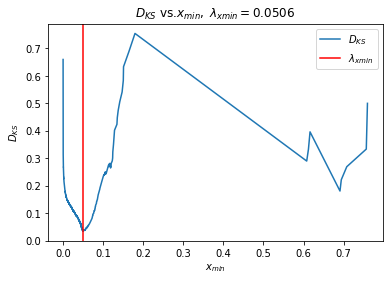

Assuming nested distributions


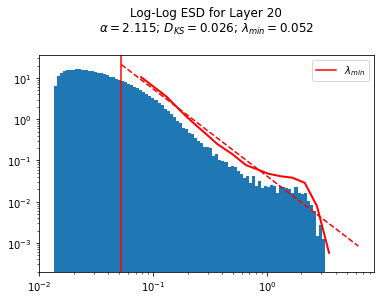

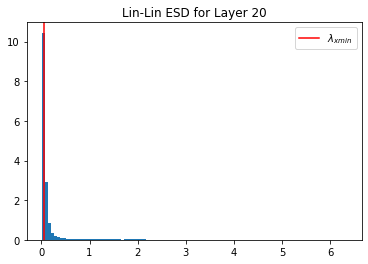

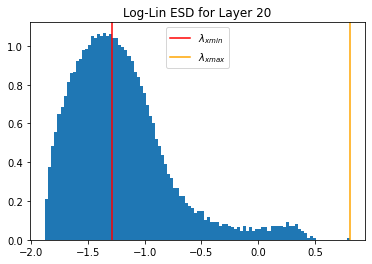

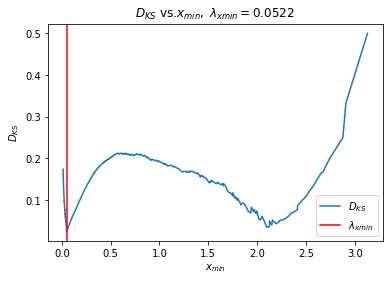

Assuming nested distributions


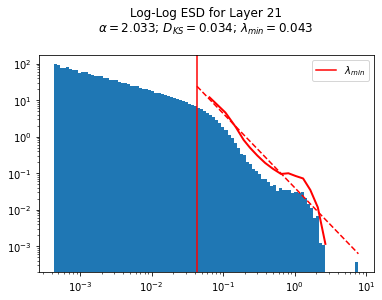

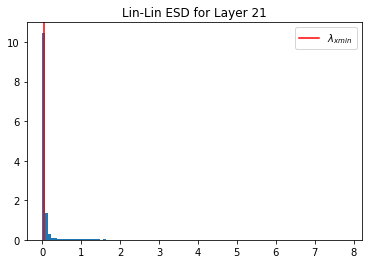

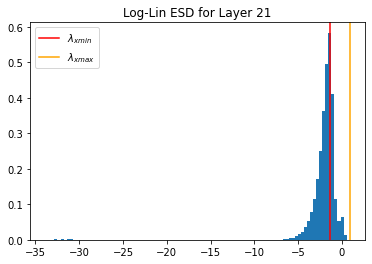

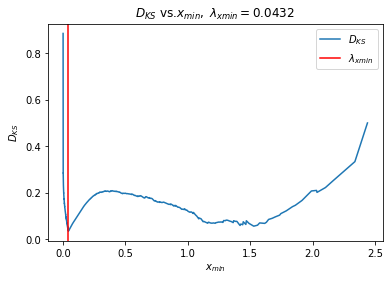

Assuming nested distributions


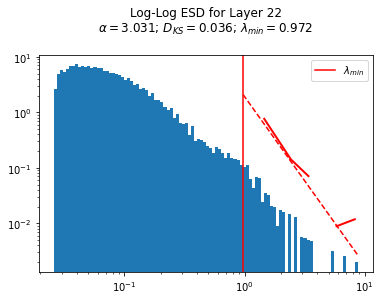

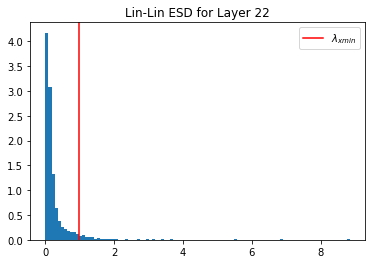

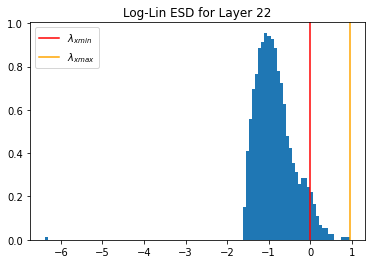

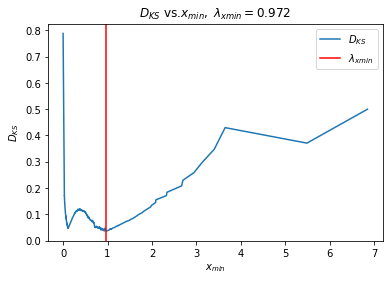

<Figure size 432x288 with 0 Axes>

In [11]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

details = watcher.analyze(plot=True)

## 2.5 Debug and Custom Logging

In [12]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.DEBUG)

import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

details = watcher.analyze()

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
DEBUG:weightwatcher:FRAMEWORKS: KERAS = 4  PYTORCH = 2 

DEBUG:weightwatcher:layer_supported  N 256 max evals None
DEBUG:weightwatcher:LAYER: 7 16  : <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
DEBUG:weightwatcher:apply ESD  on Layer 7 None 
DEBUG:weightwatcher:running SVD on Layer 7 None 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []} 
DEBUG:weightwatcher:Running full SVD:  W.shape=(128, 256)  n_comp = 128
DEBUG:weightwatcher:Running full SVD:  W.shape=(128, 256)  n_comp = 128
DEBUG:weightwatcher:Running full SVD:  W.shape=(128, 256)  n_comp = 128
DEBUG:weightwatcher:Running full SVD:  W.shape=(128, 256)  n_comp = 128
DEBUG:weightwatcher:Running full SVD:  W.shape=(128, 256)  n_comp = 128
DEBUG:weightwatcher:Running full SVD:  W.shape=(1

DEBUG:weightwatcher:running SVD on Layer 13 None 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []} 
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SV

DEBUG:weightwatcher:Running full SVD:  W.shape=(4096, 4096)  n_comp = 4096
DEBUG:weightwatcher:fitting power law on 4096 eigenvalues
DEBUG:weightwatcher:finding best distribution for fit
Assuming nested distributions
DEBUG:weightwatcher:layer_supported  N 4096 max evals None
DEBUG:weightwatcher:LAYER: 22 4  : <class 'tensorflow.python.keras.layers.core.Dense'>
DEBUG:weightwatcher:apply ESD  on Layer 22 None 
DEBUG:weightwatcher:running SVD on Layer 22 None 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []} 
DEBUG:weightwatcher:Running full SVD:  W.shape=(4096, 1000)  n_comp = 1000
DEBUG:weightwatcher:fitting power law on 1000 eigenvalues
DEBUG:weightwatcher:finding best distribution for fit
Assuming nes

## 3. pyTorch Models

In [13]:
import weightwatcher as ww
import torchvision.models as models

model = models.vgg16(pretrained=True)

watcher = ww.WeightWatcher(model=model)

details = watcher.analyze()
summary =  watcher.get_summary(details)

INFO:weightwatcher:

python      version 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]
numpy       version 1.19.5
tensforflow version 2.5.0
keras       version 2.5.0
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
DEBUG:weightwatcher:FRAMEWORKS: KERAS = 4  PYTORCH = 2 

DEBUG:weightwatcher:layer not supported: Layer 10 None has no weights
DEBUG:weightwatcher:layer_supported  N 0 max evals None
DEBUG:weightwatcher:layer not supported: Layer 11 None has no weights
DEBUG:weightwatcher:conv2D_Wmats
DEBUG:weightwatcher:Channels Last tensor shape: 256x128 (NxM), 3x3 (i,j)
DEBUG:weightwatcher:get_conv2D_Wmats N=256 M=128 rf= 9 channels = 4
DEBUG:weightwatcher:layer_supported  N 256 max evals None
DEBUG:weightwatcher:LAYER: 12 16  : <class 'torch.nn.modules.conv.Conv2d'>
DEBUG:weightwatcher:apply ESD  on Layer 12 None 
DEBUG:weightwatcher:running SVD on Layer 12 None 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []} 
DEBUG:weightwatcher:Running full SVD:  W.shape=(256, 128)  

DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:Running full SVD:  W.shape=(512, 512)  n_comp = 512
DEBUG:weightwatcher:fitting power law on 4608 eigenvalues
DEBUG:weightwatcher:finding best distribution for fit
Assuming nested distributions
DEBUG:weightwatcher:layer_supported  N 0 max evals None
DEBUG:weightwatcher:layer not supported: Layer 22 None has no weights
DEBUG:weightwatcher:conv2D_Wmats
DEBUG:weightwatcher:Channels Last tensor shape: 512x512 (NxM), 3x3 (i,j)
DEBUG:weightwatcher:get_conv2D_Wmats N=512 M=512 rf= 9 channels = 4
DEBUG:weightwatcher:layer_supported  N 512 max evals None
DEBUG:weightwatcher:LAYER: 23 16  : <class 'torch.nn.modules.conv.Conv2d'>
DEBUG:weightwatcher:apply ESD  on Layer 23 None 
DEBUG:weightwatcher:running SVD on Layer 23 None 
DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': Fa

DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []} 
DEBUG:weightwatcher:Running full SVD:  W.shape=(4096, 25088)  n_comp = 4096
DEBUG:weightwatcher:fitting power law on 4096 eigenvalues
DEBUG:weightwatcher:finding best distribution for fit
Assuming nested distributions
DEBUG:weightwatcher:layer_supported  N 0 max evals None
DEBUG:weightwatcher:layer not supported: Layer 36 None has no weights
DEBUG:weightwatcher:layer_supported  N 0 max evals None
DEBUG:weightwatcher:layer not supported: Layer 37 None has no weights
DEBUG:weightwatcher:layer_supported  N 4096 max evals None
DEBUG:weightwatcher:LAYER: 38 4  : <class 'torch.nn.modules.linear.Linear'>
DEBUG:weightwatcher:apply ESD  on Layer 38 None 
DEBUG:w